In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import ipywidgets as widgets
from IPython.display import display
import importlib

from PIL import Image

(1080, 1920, 3)

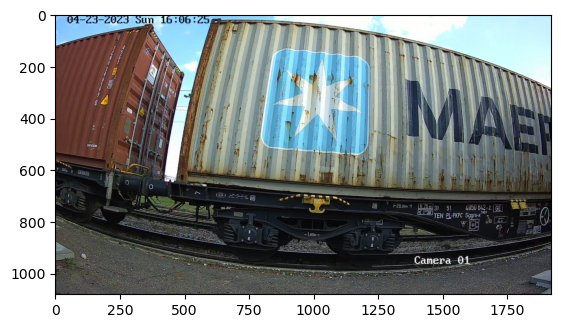

In [50]:
image_path = "resources/klatka.png"
image = np.asarray(Image.open(image_path))

plt.imshow(image)
image.shape

In [51]:
# file_path = "resources/lines/test_lines.json"
# file_path = "resources/lines/low_10.json"
file_path = "resources/lines/low_10_n.json"
# file_path = "resources/lines/low.json"

dots = {}
with open(file_path, "r") as file:
    dots = json.load(file)

dots

[{'type': 'horizontal',
  'max_dots_number': 10,
  'lines': [[[5, 125],
    [34, 115],
    [75, 102],
    [111, 95],
    [151, 87],
    [194, 73],
    [230, 65],
    [272, 59],
    [311, 51],
    [353, 47]],
   [[614, 25],
    [1903, 287],
    [728, 27],
    [1864, 268],
    [917, 34],
    [1763, 222],
    [1134, 59],
    [1637, 175],
    [1335, 95],
    [1476, 125]],
   [[465, 647],
    [1905, 714],
    [611, 668],
    [1756, 720],
    [795, 684],
    [1626, 723],
    [981, 696],
    [1500, 718],
    [1153, 711],
    [1357, 716]],
   [[509, 599],
    [1896, 682],
    [627, 615],
    [1803, 683],
    [759, 637],
    [1669, 680],
    [925, 649],
    [1506, 679],
    [1129, 662],
    [1348, 678]],
   [[11, 774],
    [1901, 887],
    [79, 803],
    [1768, 917],
    [246, 859],
    [1525, 960],
    [477, 916],
    [1283, 974],
    [700, 948],
    [976, 968]],
   [[13, 732],
    [1901, 851],
    [1629, 897],
    [190, 792],
    [470, 855],
    [921, 916],
    [1248, 925],
    [1439, 913],
 

In [52]:
def check_if_all_equal(list):
    if len(list) < 2:
        return True
    return all(ele == list[0] for ele in list)

horizontal_line_length = [len(i) for i in dots[0]["lines"]] 
vertical_line_length = [len(i) for i in dots[1]["lines"]]
print("horizontal", horizontal_line_length)
print("vertical", vertical_line_length)

horizontal_points = np.array(dots[0]["lines"], dtype=np.float64)
vertical_points = np.array(dots[1]["lines"], dtype=np.float64)
print("(liczba linii, liczba punktów w linii, współrzędne x i y)")
print(f"horizontal: {horizontal_points.shape}, vertical: {vertical_points.shape}")

horizontal [10, 10, 10, 10, 10, 10, 10]
vertical [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
(liczba linii, liczba punktów w linii, współrzędne x i y)
horizontal: (7, 10, 2), vertical: (14, 10, 2)


In [53]:
from stitch.rectify.FrameRectifier import FrameRectifier

config_path = "resources/configs/gora.json"
config = {}
with open(config_path, "r") as file:
    config = json.load(file)

W, H, _ = image.shape
frame_rectifier = FrameRectifier(config, W, H)
print(horizontal_points[0].shape)
print(horizontal_points[0])

H, W = image.shape[:2]
rectified_line = frame_rectifier.rectify_points(horizontal_points[0])
rectified_line


(10, 2)
[[  5. 125.]
 [ 34. 115.]
 [ 75. 102.]
 [111.  95.]
 [151.  87.]
 [194.  73.]
 [230.  65.]
 [272.  59.]
 [311.  51.]
 [353.  47.]]


array([[-184.00168078,  228.34556096],
       [-137.77796272,  224.6369382 ],
       [ -77.82923161,  217.17412054],
       [ -29.09081066,  212.73413252],
       [  21.34828666,  204.01006734],
       [  71.99484561,  184.49273711],
       [ 112.94652898,  170.3064675 ],
       [ 159.51575905,  155.24646671],
       [ 201.68458912,  135.98418358],
       [ 246.77842654,  118.45904963]])

In [54]:
from enum import Enum
from dataclasses import dataclass


def scale_image_by_percent(image, percent):
    width = int(image.shape[1] * percent / 100)
    height = int(image.shape[0] * percent / 100)
    dim = (width, height)

    return cv2.resize(image, dim, interpolation=cv2.INTER_AREA)


class DotStyles(Enum):
    original_horizontal = {
        "radius": 5,
        "thickness": -1,
        "color": (255, 0, 0)
    }
    original_vertical = {
        "radius": 5,
        "thickness": -1,
        "color": (255, 125, 125)
    }
    rectified_horizontal = {
        "radius": 5,
        "thickness": -1,
        "color": (0, 0, 255)
    }
    rectified_vertical = {
        "radius": 5,
        "thickness": -1,
        "color": (125, 125, 255)
    }


@dataclass
class DotDisplay:
    lines: np.ndarray
    style: DotStyles


def display_image_with_points(image, window_name, display_scale=70, *dot_displays):
    img = image.copy()

    for dot_display in dot_displays:
        for line in dot_display.lines.astype(int):
            for point in line:
                cv2.circle(img, center=point, **dot_display.style.value)

    cv2.imshow(window_name, scale_image_by_percent(img, display_scale))
    cv2.waitKey(0)

In [55]:
horizontal_display = DotDisplay(horizontal_points, DotStyles.original_horizontal)
vertical_display = DotDisplay(vertical_points, DotStyles.original_vertical)

show_original_button = widgets.Button(description = "show original image")
display(show_original_button)

def on_button_clicked(b):
    display_image_with_points(image, "original", 70, horizontal_display, vertical_display)
    
    
show_original_button.on_click(on_button_clicked)

Button(description='show original image', style=ButtonStyle())

In [56]:
print("horizontal")
print(horizontal_points.shape)
# same y
print(horizontal_points[:, :, 1])
# odchylenia standardowe dla każdej linii
print(horizontal_points[:, :, 1].std(axis=1))

print("vertical")
print(vertical_points.shape)
# same x
print(vertical_points[:, :, 0])
# odchylenia standardowe dla każdej linii
print(vertical_points[:, :, 0].std(axis=1))

horizontal
(7, 10, 2)
[[125. 115. 102.  95.  87.  73.  65.  59.  51.  47.]
 [ 25. 287.  27. 268.  34. 222.  59. 175.  95. 125.]
 [647. 714. 668. 720. 684. 723. 696. 718. 711. 716.]
 [599. 682. 615. 683. 637. 680. 649. 679. 662. 678.]
 [774. 887. 803. 917. 859. 960. 916. 974. 948. 968.]
 [732. 851. 897. 792. 855. 916. 925. 913. 881. 887.]
 [849. 859. 859. 823. 803. 782. 762. 843. 851. 856.]]
[25.72333571 95.54794608 24.35179665 28.92818695 66.09114918 57.95075496
 33.19352346]
vertical
(14, 10, 2)
[[ 367.  339.  311.  277.  256.  228.  218.  242.  288.  319.]
 [ 602.  469.  578.  484.  551.  496.  529.  508.  591.  473.]
 [ 678.  558.  566.  581.  603.  614.  630.  654.  659.  587.]
 [ 494.  425.  481.  424.  434.  441.  458.  468.  492.  436.]
 [ 402.  273.  380.  357.  336.  319.  303.  287.  280.  360.]
 [ 430.  316.  409.  328.  352.  360.  369.  384.  420.  336.]
 [ 468.  379.  387.  396.  409.  418.  429.  441.  453.  393.]
 [1854. 1879. 1877. 1873. 1869. 1867. 1863. 1859. 1852. 1

In [57]:
from scipy.optimize import minimize
import math
import cv2

# global
sensor_h = 3.69
sensor_w = 7.38
W = 1920
H = 1080


def rectify_points(config, lines):
    X = config[0]
    Y = config[1]
    alpha = config[2]
    beta = config[3]
    gamma = config[4]
    focus = config[5]
    scale = config[6]
    dist = config[7:]

    Rx = np.array([[1, 0, 0], [0, math.cos(alpha), -math.sin(alpha)], [0, math.sin(alpha), math.cos(alpha)]])
    Ry = np.array([[math.cos(beta), 0, -math.sin(beta)], [0, 1, 0], [math.sin(beta), 0, math.cos(beta)]])
    Rz = np.array([[math.cos(gamma), -math.sin(gamma), 0], [math.sin(gamma), math.cos(gamma), 0], [0, 0, 1]])
    R = np.matmul(Rx, np.matmul(Ry, Rz))

    K = np.array([
        [W * focus / sensor_w, 0, W // 2],
        [0, H * focus / sensor_h, H // 2],
        [0, 0, 1]])
    new_K = np.array([
        [W * focus / sensor_w, 0, scale * W // 2 + X, 0],
        [0, H * focus / sensor_h, scale * H // 2 + Y, 0],
        [0, 0, 1, 0]])

    result = np.zeros(lines.shape)

    for index, line in enumerate(lines):
        res = cv2.undistortPoints(line, K, dist, R=R, P=new_K)
        result[index] = np.reshape(res, (-1, 2)) 

    return result

    # res = cv2.undistortPoints(points, K, dist, R=R, P=new_K)
    # return np.reshape(res, (-1, 2))

def objective_function(x, horizontal, vertical):
    horizontal_rectified = rectify_points(x, horizontal) 
    vertical_rectified = rectify_points(x, vertical)

    # odchylenia standardowe dla każdej linii
    horizontal_std = horizontal_rectified[:, :, 1].std(axis=1)
    vertical_std = vertical_rectified[:, :, 0].std(axis=1)
    
    return horizontal_std.sum() + vertical_std.sum() 
    


In [133]:
bounds = {
    'X': (-100, 100), 
    'Y': (40, 100), 
    'alpha': (-0.1, 0.1), 
    'beta': (-0.1, 0.1), 
    'gamma': (-0.1, 0.1), 
    "focus": (1.8, 6.0),
    "scale": (1.0, 1.0),
    'k1': (-0.2, 0.2),
    'k2': (-0.2, 0.2),
    'k3': (-0.2, 0.2),
    'p1': (-0.2, 0.2),
    'p2': (-0.2, 0.2)
}

init_values = {
    'X': 0, 
    'Y': 0, 
    'alpha': 0, 
    'beta': 0, 
    'gamma': 0,
    "focus": 4,
    "scale": 1,
    'k1': 0,
    'k2': 0,
    'k3': 0,
    'p1': 0,
    'p2': 0
}

x0 = np.array(list(init_values.values()))
bounds_list = list(bounds.values())

res = objective_function(x0, horizontal_points, vertical_points)
print(res)

minimize_params = {
    "method": "nelder-mead",
    "args": (horizontal_points, vertical_points),
    "bounds": bounds_list,
    "options": {'disp': True, "maxiter": 50000}
}

res = minimize(objective_function, x0, **minimize_params)

743.4368038928642


C:\Users\wrzezniczak\AppData\Local\Temp\ipykernel_8816\1282376152.py:44: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(objective_function, x0, **minimize_params)


Optimization terminated successfully.
         Current function value: 166.466416
         Iterations: 7602
         Function evaluations: 10382


In [134]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 166.46641649535593
             x: [ 3.439e+00  2.500e+01  1.000e-01 -2.324e-02 -7.281e-02
                  1.800e+00  1.000e+00 -5.848e-02  3.234e-03  2.264e-05
                  5.451e-04 -8.886e-05]
           nit: 7602
          nfev: 10382
 final_simplex: (array([[ 3.439e+00,  2.500e+01, ...,  5.451e-04,
                        -8.886e-05],
                       [ 3.439e+00,  2.500e+01, ...,  5.451e-04,
                        -8.886e-05],
                       ...,
                       [ 3.439e+00,  2.500e+01, ...,  5.451e-04,
                        -8.886e-05],
                       [ 3.439e+00,  2.500e+01, ...,  5.451e-04,
                        -8.886e-05]]), array([ 1.665e+02,  1.665e+02, ...,  1.665e+02,  1.665e+02]))

In [135]:
def make_config_from_res(res):
    return {
        'sensor_h': sensor_h,
        'sensor_w': sensor_w,
        'X': res.x[0],
        'Y': res.x[1],
        'alpha': res.x[2],
        'beta': res.x[3],
        'gamma': res.x[4],
        'focus': res.x[5],
        'scale': res.x[6],
        'dist': res.x[7:].tolist()
    }

rectify_config = make_config_from_res(res)
rectify_config

{'sensor_h': 3.69,
 'sensor_w': 7.38,
 'X': 3.439232640698549,
 'Y': 25.001950897812634,
 'alpha': 0.09999999999999827,
 'beta': -0.023239649872711314,
 'gamma': -0.07280794726293055,
 'focus': 1.8000000000000655,
 'scale': 1.0,
 'dist': [-0.05848076943532343,
  0.003234428996952421,
  2.2636243705309667e-05,
  0.0005451376542446863,
  -8.885879432798622e-05]}

In [136]:
from stitch.rectify.FrameRectifier import FrameRectifier

frame_rectifier = FrameRectifier(rectify_config, W, H)

def show_rectified(b):
    frame_rectifier.calc_maps()
    rectified_image = frame_rectifier.rectify(image)

    rectified_image = scale_image_by_percent(rectified_image, 50)
    cv2.imshow('Frame', rectified_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

rectify_button = widgets.Button(description = "show rectified image")



display(rectify_button)

rectify_button.on_click(show_rectified)

Button(description='show rectified image', style=ButtonStyle())

In [137]:

export_button = widgets.Button(description = "export config")
text_field = widgets.Text(
    value='rectify_config.json',
    description='Output file:'
)

display(text_field, export_button)

def export_config(b):
    file_name = text_field.value

    with open(file_name, 'w') as f:
        json.dump(rectify_config, f)

    print(f"{file_name} saved")

export_button.on_click(export_config)

Text(value='rectify_config.json', description='Output file:')

Button(description='export config', style=ButtonStyle())